<a href="https://colab.research.google.com/github/karabomaboka/NEMISA-Masterclass-Intercodex/blob/main/University_Qualifications_in_South_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Define the number of records you want in your dataset
num_records = 100

# Create a list of universities
universities = ["University of Cape Town", "University of Witwatersrand", "University of Pretoria", "Stellenbosch University", "University of Johannesburg"]

# Create a list of qualification levels
qualification_levels = ["Bachelor's Degree", "Master's Degree", "Doctorate", "Diploma"]

# Generate random qualification completion years within a range (e.g., last 10 years)
start_year = 2013
end_year = 2022
completion_years = np.random.choice(range(start_year, end_year + 1), num_records)

# Generate random qualification fields
qualification_fields = ["Computer Science", "Business Administration", "Engineering", "Biology", "History", "Economics", "Psychology", "Education"]

# Create a DataFrame to store the university qualifications data
qualifications_df = pd.DataFrame({
    "University": np.random.choice(universities, num_records),
    "Qualification Level": np.random.choice(qualification_levels, num_records),
    "Completion Year": completion_years,
    "Qualification Field": np.random.choice(qualification_fields, num_records)
})

# Display the first few records of the dataset
print(qualifications_df.head())


                    University Qualification Level  Completion Year  \
0      Stellenbosch University             Diploma             2014   
1       University of Pretoria           Doctorate             2022   
2       University of Pretoria           Doctorate             2020   
3      University of Cape Town             Diploma             2013   
4  University of Witwatersrand     Master's Degree             2017   

  Qualification Field  
0             History  
1    Computer Science  
2           Economics  
3          Psychology  
4           Economics  


In [2]:
# Check for missing data
missing_data = qualifications_df.isnull().sum()
print("Missing Data:\n", missing_data)

# Convert 'Completion Year' to datetime
qualifications_df['Completion Year'] = pd.to_datetime(qualifications_df['Completion Year'], format='%Y')


Missing Data:
 University             0
Qualification Level    0
Completion Year        0
Qualification Field    0
dtype: int64


In [3]:
# Summary statistics
summary_stats = qualifications_df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                          University Qualification Level      Completion Year  \
count                           100                 100                  100   
unique                            5                   4                   10   
top     University of Witwatersrand   Bachelor's Degree  2021-01-01 00:00:00   
freq                             22                  31                   15   
first                           NaN                 NaN  2013-01-01 00:00:00   
last                            NaN                 NaN  2022-01-01 00:00:00   

       Qualification Field  
count                  100  
unique                   8  
top                History  
freq                    17  
first                  NaN  
last                   NaN  


<ipython-input-3-24373980b51f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = qualifications_df.describe()


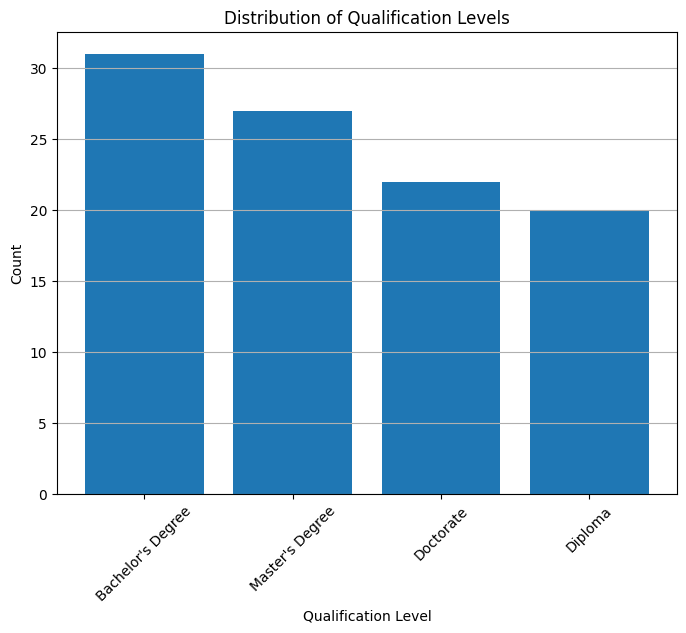

In [4]:
import matplotlib.pyplot as plt

# Count the number of qualifications at each level
qualification_distribution = qualifications_df['Qualification Level'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
plt.bar(qualification_distribution.index, qualification_distribution.values)
plt.title("Distribution of Qualification Levels")
plt.xlabel("Qualification Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


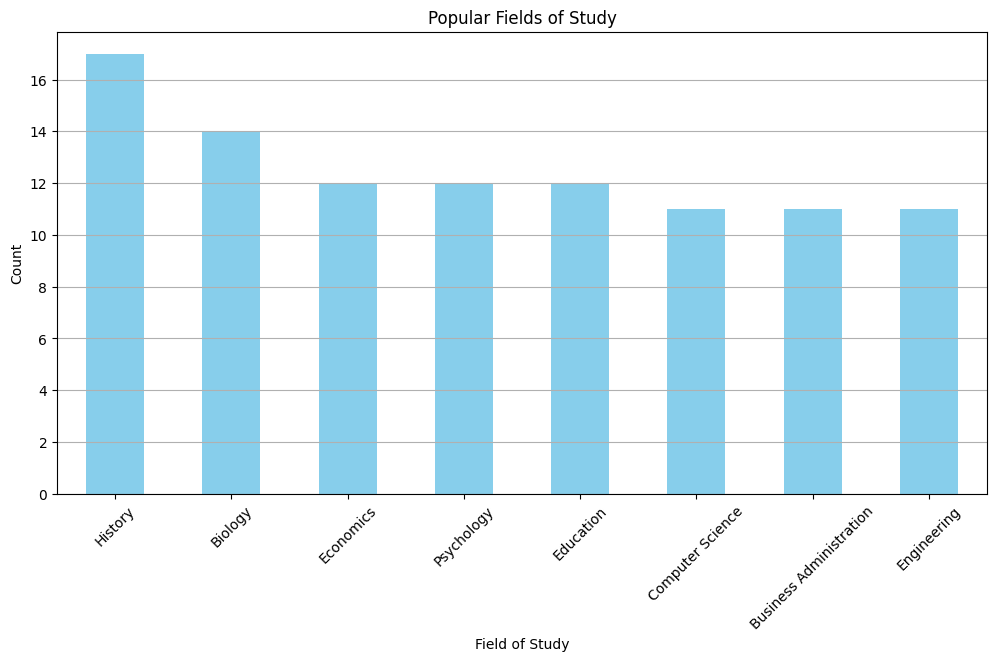

In [5]:
# Count the number of qualifications in each field of study
field_of_study_counts = qualifications_df['Qualification Field'].value_counts()

# Create a bar chart to visualize popular fields of study
plt.figure(figsize=(12, 6))
field_of_study_counts.plot(kind='bar', color='skyblue')
plt.title("Popular Fields of Study")
plt.xlabel("Field of Study")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


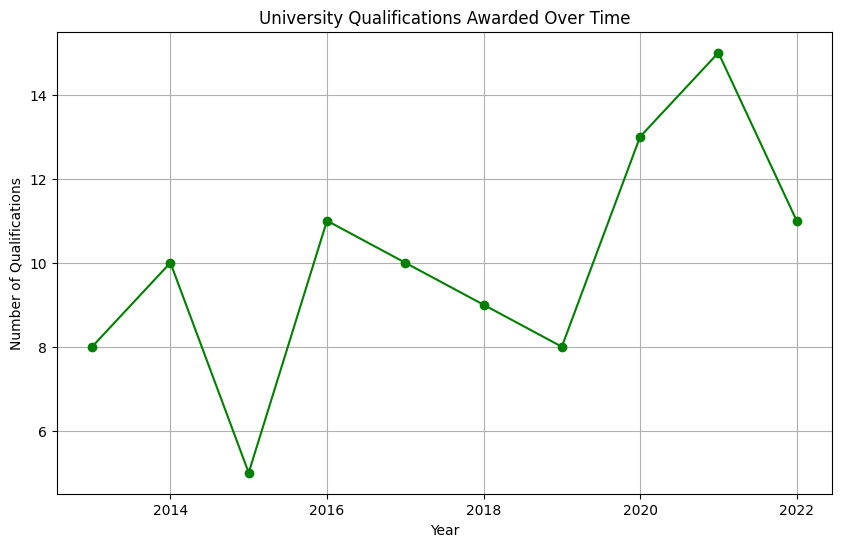

In [6]:
# Group data by completion year and count the number of qualifications awarded each year
qualification_trends = qualifications_df['Completion Year'].dt.year.value_counts().sort_index()

# Create a line plot to visualize qualification trends
plt.figure(figsize=(10, 6))
plt.plot(qualification_trends.index, qualification_trends.values, marker='o', color='green')
plt.title("University Qualifications Awarded Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Qualifications")
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

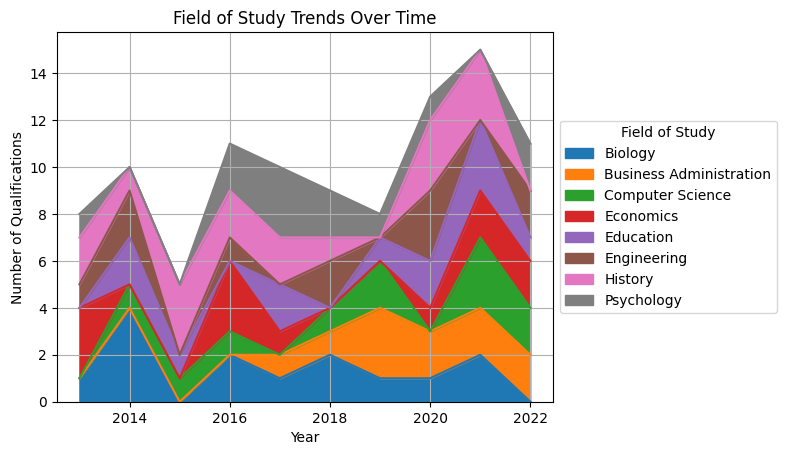

In [7]:
# Group data by completion year and qualification field and count the number of qualifications in each field
field_of_study_trends = qualifications_df.groupby([qualifications_df['Completion Year'].dt.year, 'Qualification Field']).size().unstack(fill_value=0)

# Create a stacked area plot to visualize field of study trends
plt.figure(figsize=(12, 6))
field_of_study_trends.plot.area(stacked=True)
plt.title("Field of Study Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Qualifications")
plt.grid(True)
plt.legend(title="Field of Study", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
